IMPORT ALL LIBRARIES


In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

LOADING THE DATASET


In [47]:
df = pd.read_csv("dataset.csv")
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female


DATA MANIPULATION AND ANALYSIS

In [48]:
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,337.000000,342.000000,342.000000,342.000000
mean,43.876855,17.151170,200.915205,4273.976608
std,5.478600,1.974793,14.061714,1119.229602
min,32.100000,13.100000,172.000000,2700.000000
25%,39.200000,15.600000,190.000000,3550.000000
50%,44.100000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4793.750000
max,59.600000,21.500000,231.000000,15000.000000


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     337 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                328 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


Q1: Identify missing or incorrect data in the dataset and apply appropriate preprocessing steps to clean it (code and explanation)

In [50]:
df.isnull().sum()

species               0
island                0
bill_length_mm        7
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  16
dtype: int64

In [51]:
for column in df.columns:
  if df[column].dtype == 'float64':
    df[column].fillna(df[column].mean(), inplace=True)

df.isnull().sum()


species               0
island                0
bill_length_mm        0
bill_depth_mm         0
flipper_length_mm     0
body_mass_g           0
sex                  16
dtype: int64

In [52]:
for column in df.columns:
  if df[column].dtype == 'object':
    df[column].fillna(df[column].mode()[0], inplace=True)

df.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [53]:
for column in df.columns:
  if df[column].dtype == 'object':
    print(f"Unique values for column '{column}':")
    for value, count in df[column].value_counts().items():
      print(f"  - {value}: {count}")

Unique values for column 'species':
  - Adelie: 152
  - Gentoo: 124
  - Chinstrap: 68
Unique values for column 'island':
  - Biscoe: 168
  - Dream: 124
  - Torgersen: 52
Unique values for column 'sex':
  - male: 180
  - female: 162
  - unknown: 2


In [54]:
if 'sex' in df.columns and 'unknown' in df['sex'].unique():
  mode_sex = df['sex'].mode()[0]
  df['sex'] = df['sex'].replace('unknown', mode_sex)


In [55]:
for column in df.columns:
  if df[column].dtype == 'object':
    print(f"Unique values for column '{column}':")
    for value, count in df[column].value_counts().items():
      print(f"  - {value}: {count}")

Unique values for column 'species':
  - Adelie: 152
  - Gentoo: 124
  - Chinstrap: 68
Unique values for column 'island':
  - Biscoe: 168
  - Dream: 124
  - Torgersen: 52
Unique values for column 'sex':
  - male: 182
  - female: 162


Q2: What is the average body_mass_g for Gentoo penguins? (code)

In [56]:
average_body_mass_gentoo = df[df['species'] == 'Gentoo']['body_mass_g'].mean()
print(f"The average body mass for Gentoo penguins is: {average_body_mass_gentoo}")

The average body mass for Gentoo penguins is: 5126.806262969251


Q3: How do the distributions of bill_length_mm and bill_depth_mm differ between the three penguin species? Analyze the skewness and kurtosis of each feature for different species. (code and explanation)

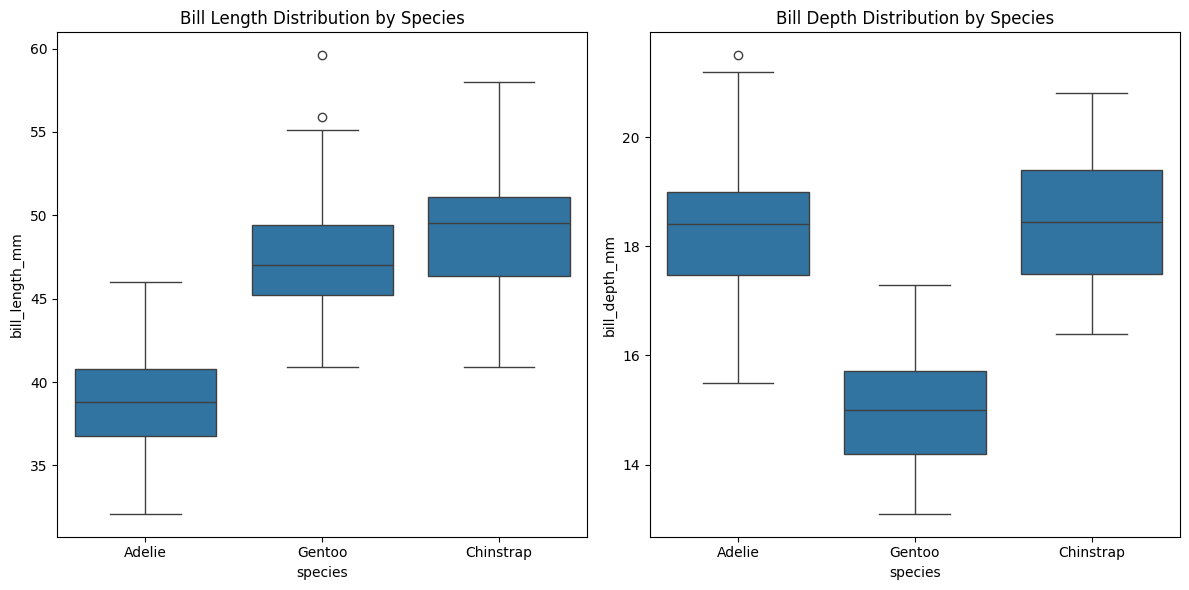

In [57]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='species', y='bill_length_mm', data=df)
plt.title('Bill Length Distribution by Species')

plt.subplot(1, 2, 2)
sns.boxplot(x='species', y='bill_depth_mm', data=df)
plt.title('Bill Depth Distribution by Species')

plt.tight_layout()
plt.show()


Skewness and Kurtosis for Adelie Penguins:
------------------------------
Skewness:
bill_length_mm       0.164158
bill_depth_mm        0.332500
flipper_length_mm    0.082953
body_mass_g          8.806182
dtype: float64
Kurtosis:
bill_length_mm       -0.195252
bill_depth_mm        -0.063940
flipper_length_mm     0.279111
body_mass_g          96.320538
dtype: float64


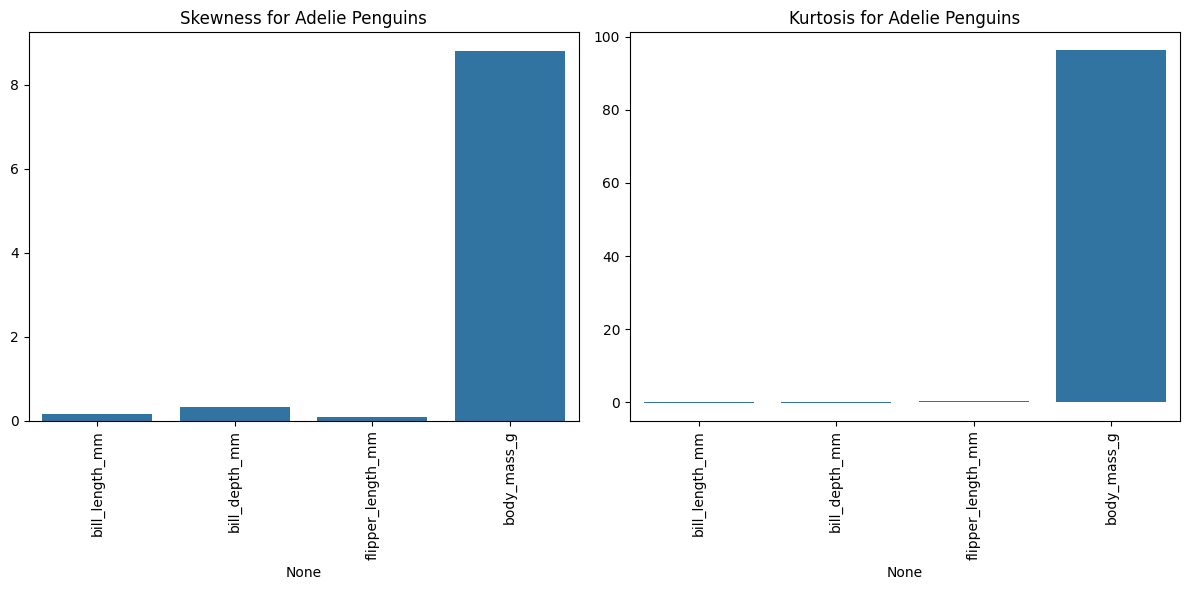


Skewness and Kurtosis for Gentoo Penguins:
------------------------------
Skewness:
bill_length_mm       0.721075
bill_depth_mm        0.338734
flipper_length_mm    0.305633
body_mass_g          5.120683
dtype: float64
Kurtosis:
bill_length_mm        1.245297
bill_depth_mm        -0.586510
flipper_length_mm    -0.460708
body_mass_g          43.209261
dtype: float64


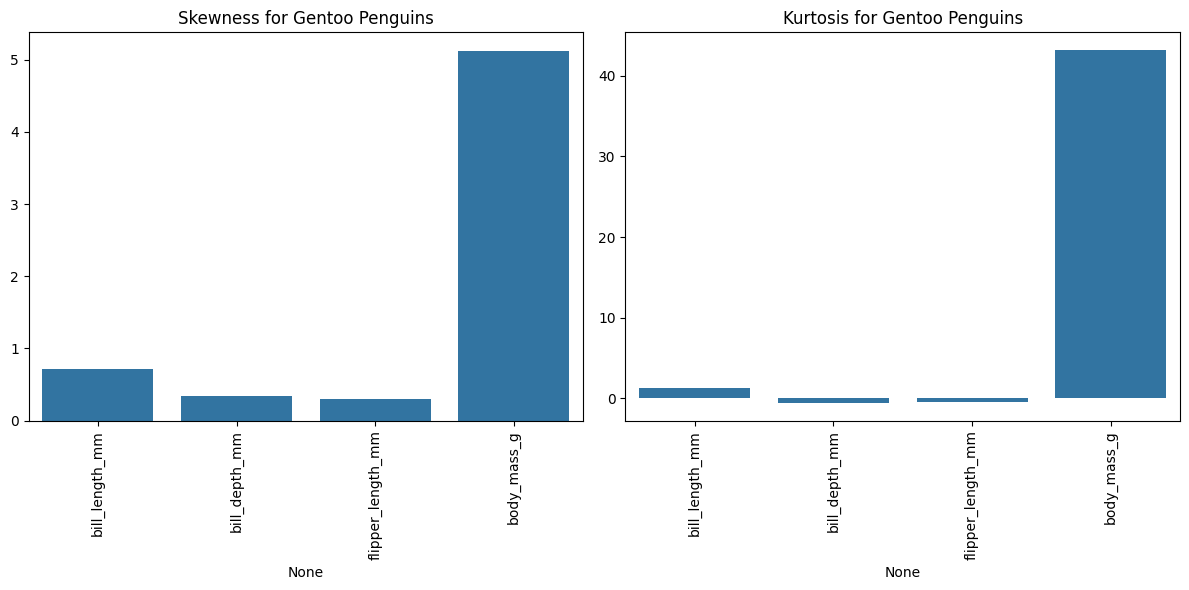


Skewness and Kurtosis for Chinstrap Penguins:
------------------------------
Skewness:
bill_length_mm      -0.098114
bill_depth_mm        0.006879
flipper_length_mm   -0.009472
body_mass_g          5.852497
dtype: float64
Kurtosis:
bill_length_mm       -0.039931
bill_depth_mm        -0.874796
flipper_length_mm     0.046358
body_mass_g          42.535098
dtype: float64


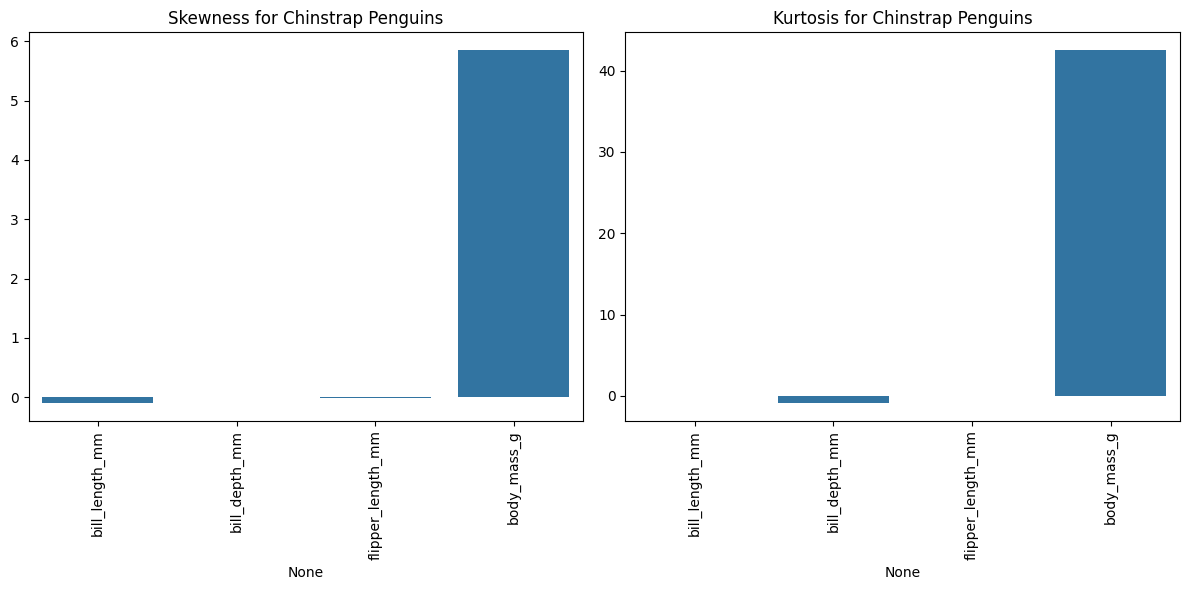

In [58]:
species_list = df['species'].unique()

for species in species_list:
  df_species = df[df['species'] == species]

  skewness_df = df_species.select_dtypes(include=np.number).skew()
  kurtosis_df = df_species.select_dtypes(include=np.number).kurt()

  print(f"\nSkewness and Kurtosis for {species} Penguins:")
  print("-" * 30)
  print(f"Skewness:\n{skewness_df}")
  print(f"Kurtosis:\n{kurtosis_df}")

  plt.figure(figsize=(12, 6))
  plt.subplot(1, 2, 1)
  sns.barplot(x=skewness_df.index, y=skewness_df.values)
  plt.title(f"Skewness for {species} Penguins")
  plt.xticks(rotation=90)

  plt.subplot(1, 2, 2)
  sns.barplot(x=kurtosis_df.index, y=kurtosis_df.values)
  plt.title(f"Kurtosis for {species} Penguins")
  plt.xticks(rotation=90)

  plt.tight_layout()
  plt.show()

Q4: Identify which features in the dataset have outliers. Provide the method used to detect them and visualize the outliers. (code and explanation)

In [59]:
def detect_outliers_iqr(data):
  Q1 = np.percentile(data, 25)
  Q3 = np.percentile(data, 75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  outliers = [x for x in data if x < lower_bound or x > upper_bound]
  return outliers

for column in df.select_dtypes(include=np.number).columns:
  outliers = detect_outliers_iqr(df[column])
  if outliers:
    print(f"Outliers found in '{column}': {outliers}")
  else:
    print(f"No outliers found in '{column}'")


No outliers found in 'bill_length_mm'
No outliers found in 'bill_depth_mm'
No outliers found in 'flipper_length_mm'
Outliers found in 'body_mass_g': [15000.0, 12000.0, 10000.0]


No outliers found in 'bill_length_mm'


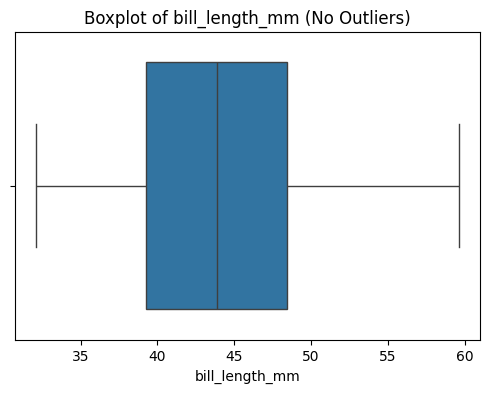

No outliers found in 'bill_depth_mm'


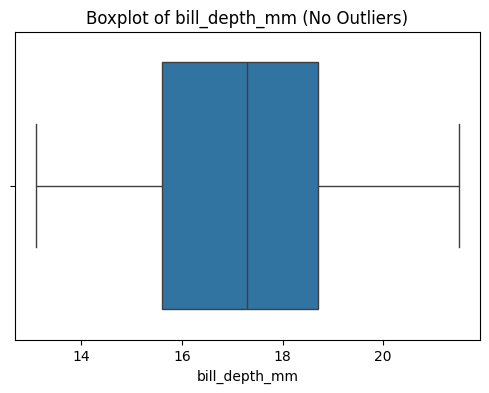

No outliers found in 'flipper_length_mm'


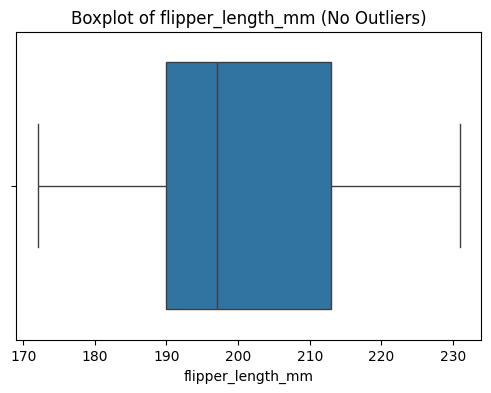

Outliers found in 'body_mass_g': [15000.0, 12000.0, 10000.0]


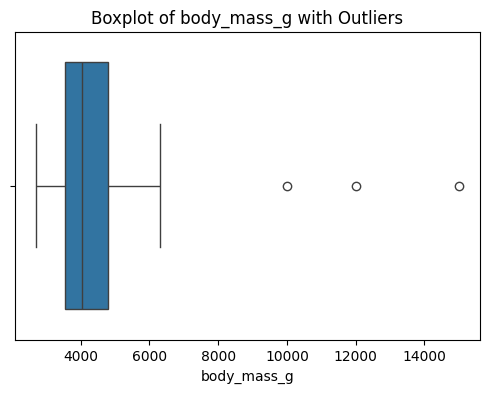

In [60]:
def detect_outliers_iqr(data):
  Q1 = np.percentile(data, 25)
  Q3 = np.percentile(data, 75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  outliers = [x for x in data if x < lower_bound or x > upper_bound]
  return outliers

for column in df.select_dtypes(include=np.number).columns:
  outliers = detect_outliers_iqr(df[column])
  if outliers:
    print(f"Outliers found in '{column}': {outliers}")
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[column])
    plt.title(f"Boxplot of {column} with Outliers")
    plt.show()
  else:
    print(f"No outliers found in '{column}'")
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[column])
    plt.title(f"Boxplot of {column} (No Outliers)")
    plt.show()


In [61]:
def detect_outliers_iqr(data):
  Q1 = np.percentile(data, 25)
  Q3 = np.percentile(data, 75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  outliers = [x for x in data if x < lower_bound or x > upper_bound]
  return outliers



for column in df.select_dtypes(include=np.number).columns:
  outliers = detect_outliers_iqr(df[column])
  if outliers:
    median_value = df[column].median()
    df[column] = np.where(df[column].isin(outliers), median_value, df[column])
    print(f"Outliers in '{column}' replaced with median: {median_value}")
  else:
    print(f"No outliers found in '{column}'")


No outliers found in 'bill_length_mm'
No outliers found in 'bill_depth_mm'
No outliers found in 'flipper_length_mm'
Outliers in 'body_mass_g' replaced with median: 4050.0


Q5: Does this dataset contribute to the curse of dimensionality? If yes perform PCA. (code and explanation required)

In [62]:
num_features = df.shape[1]
num_samples = df.shape[0]

print(f"Number of features: {num_features}")
print(f"Number of samples: {num_samples}")


ratio = num_features / num_samples

print(f"Ratio of features to samples: {ratio}")


if ratio > 0.1:
  print("The dataset may contribute to the curse of dimensionality.")
  print("The number of features is relatively high compared to the number of samples.")
else:
  print("The dataset is likely not significantly affected by the curse of dimensionality.")
  print("The number of features is relatively low compared to the number of samples.")

Number of features: 7
Number of samples: 344
Ratio of features to samples: 0.020348837209302327
The dataset is likely not significantly affected by the curse of dimensionality.
The number of features is relatively low compared to the number of samples.


Q6: Use bill_length_mm vs bill_depth_mm and plot 7 different graphs to visualize them. (code)

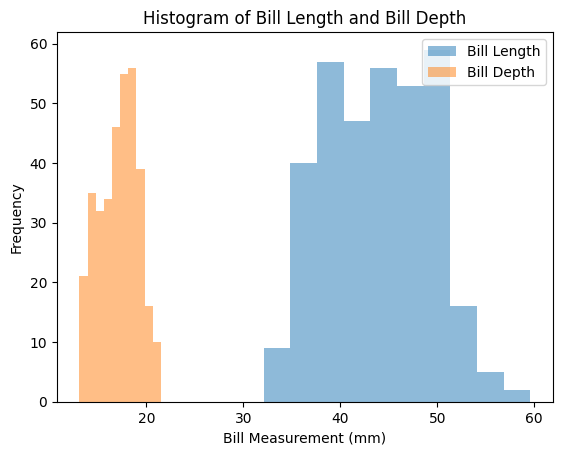

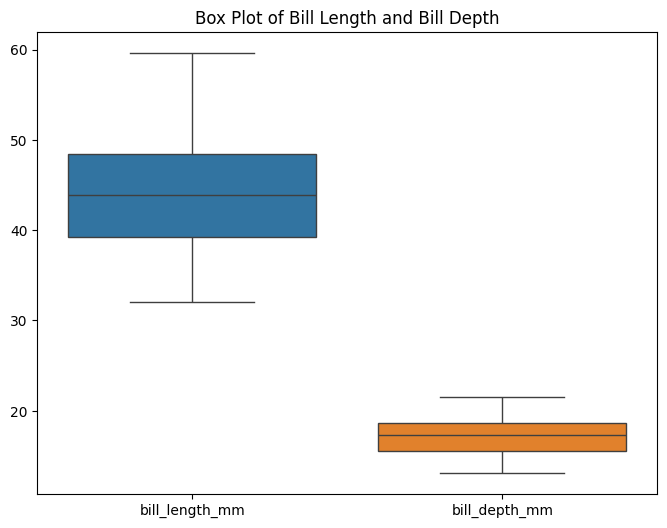

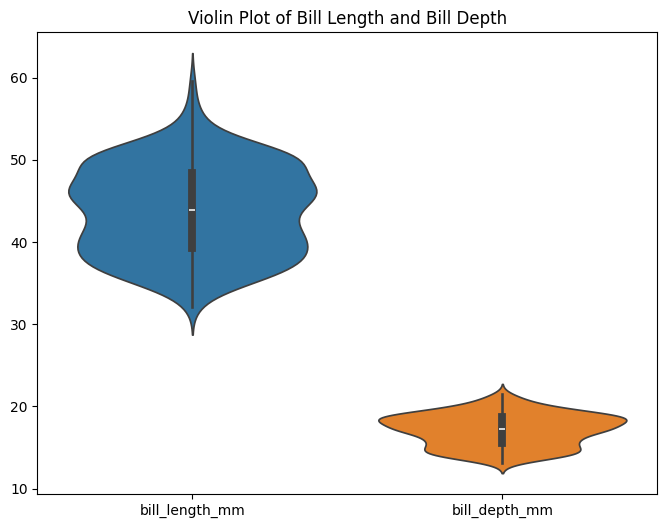

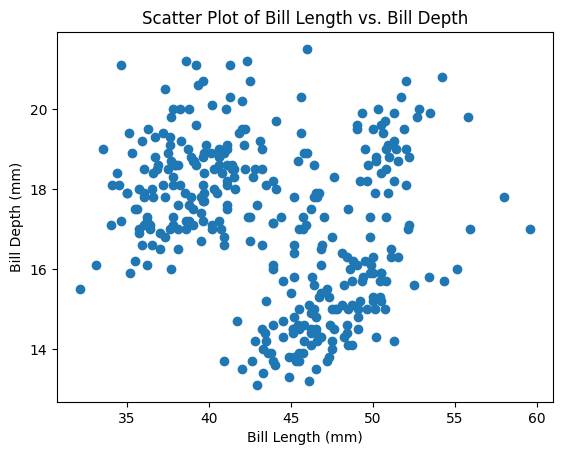

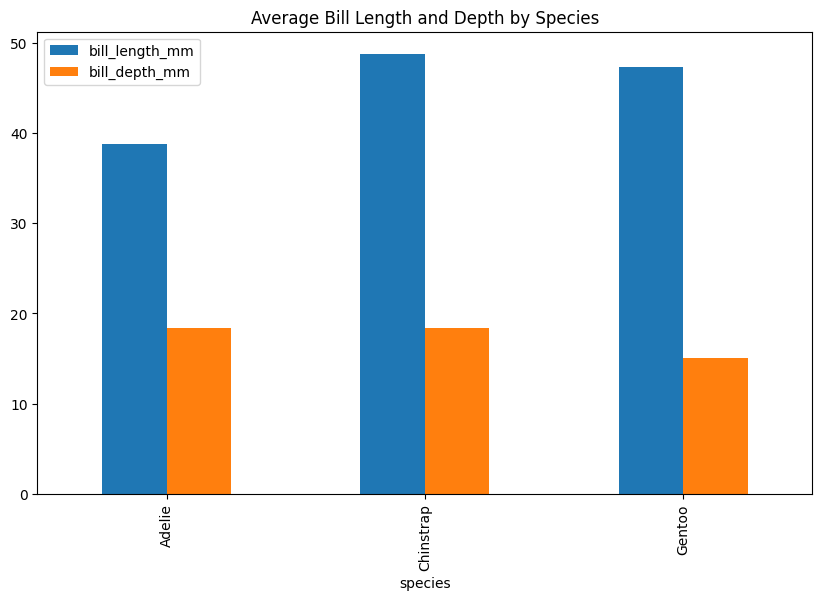

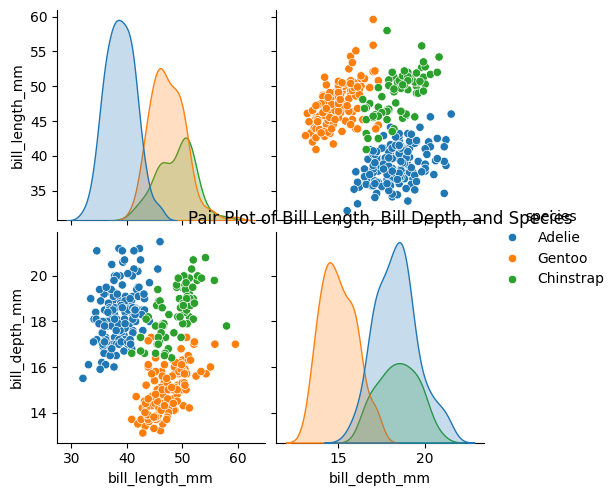

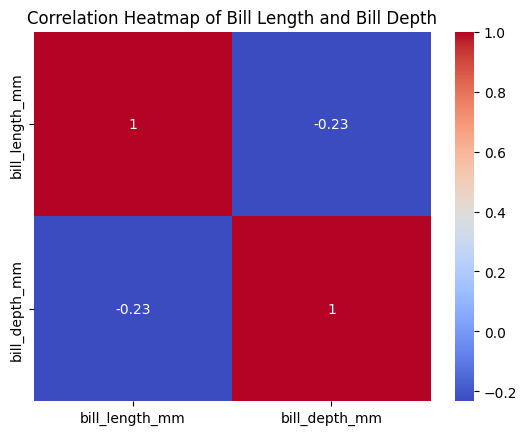

In [63]:

# 1. Histogram
plt.hist(df['bill_length_mm'], bins=10, alpha=0.5, label='Bill Length')
plt.hist(df['bill_depth_mm'], bins=10, alpha=0.5, label='Bill Depth')
plt.xlabel('Bill Measurement (mm)')
plt.ylabel('Frequency')
plt.title('Histogram of Bill Length and Bill Depth')
plt.legend()
plt.show()

# 2. Box Plot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df[['bill_length_mm', 'bill_depth_mm']])
plt.title('Box Plot of Bill Length and Bill Depth')
plt.show()

# 3. Violin Plot
plt.figure(figsize=(8, 6))
sns.violinplot(data=df[['bill_length_mm', 'bill_depth_mm']])
plt.title('Violin Plot of Bill Length and Bill Depth')
plt.show()

# 4. Scatter Plot
plt.scatter(df['bill_length_mm'], df['bill_depth_mm'])
plt.xlabel('Bill Length (mm)')
plt.ylabel('Bill Depth (mm)')
plt.title('Scatter Plot of Bill Length vs. Bill Depth')
plt.show()

# 5. Bar Plot 
bill_by_species = df.groupby('species').agg({'bill_length_mm': 'mean', 'bill_depth_mm': 'mean'})
bill_by_species.plot(kind='bar', figsize=(10, 6))
plt.title('Average Bill Length and Depth by Species')
plt.show()

# 6. Pair Plot
sns.pairplot(df[['bill_length_mm', 'bill_depth_mm', 'species']], hue='species')
plt.title('Pair Plot of Bill Length, Bill Depth, and Species')
plt.show()

# 7. Heatmap 
correlation_matrix = df[['bill_length_mm', 'bill_depth_mm']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Bill Length and Bill Depth')
plt.show()


Q7: Find the maximum flipper_length_mm for each combination of species and island. Which species has the longest flippers on each island? (code)

In [64]:
max_flipper_length = df.groupby(['species', 'island'])['flipper_length_mm'].max()


print(max_flipper_length)

for (species, island), max_length in max_flipper_length.items():
  rows = df[(df['species'] == species) & (df['island'] == island)]
  rows_with_max_length = rows[rows['flipper_length_mm'] == max_length]
  if not rows_with_max_length.empty:
    print(f"On {island}, the species with the longest flippers is {species}, with a maximum length of {max_length} mm.")


species    island   
Adelie     Biscoe       203.0
           Dream        208.0
           Torgersen    210.0
Chinstrap  Dream        212.0
Gentoo     Biscoe       231.0
Name: flipper_length_mm, dtype: float64
On Biscoe, the species with the longest flippers is Adelie, with a maximum length of 203.0 mm.
On Dream, the species with the longest flippers is Adelie, with a maximum length of 208.0 mm.
On Torgersen, the species with the longest flippers is Adelie, with a maximum length of 210.0 mm.
On Dream, the species with the longest flippers is Chinstrap, with a maximum length of 212.0 mm.
On Biscoe, the species with the longest flippers is Gentoo, with a maximum length of 231.0 mm.


Q8: Perform z-score normalization on this dataset. (code)

In [65]:
numerical_features = df.select_dtypes(include=np.number)
scaler = StandardScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(numerical_features), columns=numerical_features.columns)
print(df_normalized.head())

   bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
0       -0.882230       0.787743          -1.422488    -0.567475
1       -0.808355       0.126556          -1.065352    -0.504665
2       -0.660604       0.431719          -0.422507    -1.195576
3        0.000000       0.000000           0.000000     0.090746
4       -1.325483       1.092905          -0.565361    -0.944336
